In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [2]:
exams = Table.read_table('data/exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


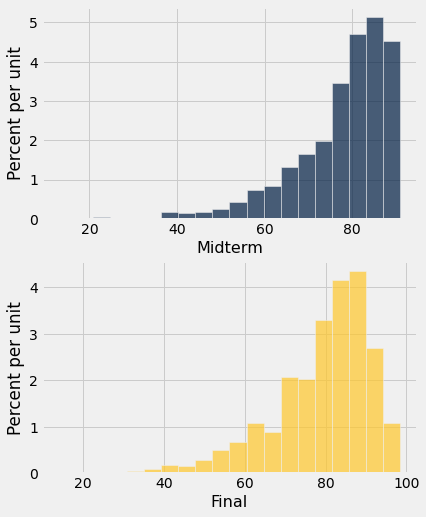

In [3]:
exams.hist(overlay=False, bins=20)

In [4]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [6]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(20)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


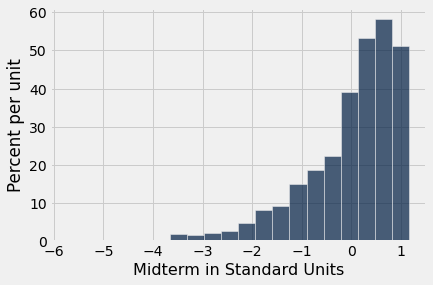

In [7]:
exams.hist('Midterm in Standard Units', bins=20)

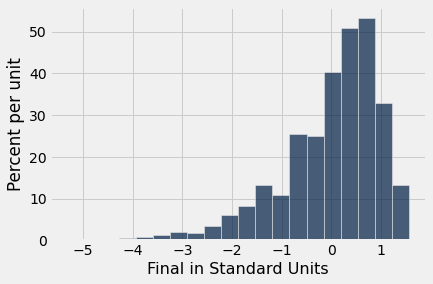

In [8]:
exams.hist('Final in Standard Units', bins=20)

## Central Limit Theorem ##

In [10]:
united = Table.read_table('data/united.csv') # change file path name to data/united.csv
united_bins = np.arange(-20, 300, 10) # (-20, -10, 0, 10,...300)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


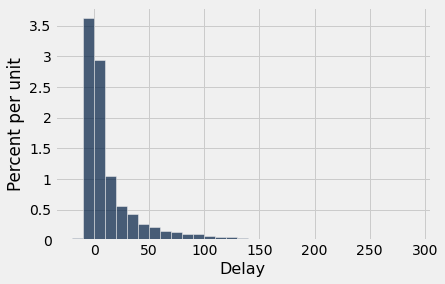

In [11]:
united.hist('Delay', bins=united_bins)

In [12]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [13]:
percentile(50, delays)

2

In [14]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [15]:
one_sample_mean(100)

11.66

In [16]:
def ten_thousand_sample_means(sample_size):
    """ repeating one_sample_mean 10,000 times, we get 10,000 different samples of 
    given sample size """
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [17]:
sample_means_100 = ten_thousand_sample_means(100)

In [18]:
sample_means_100

array([18.14, 19.7 , 12.58, ..., 10.33, 18.14, 21.  ])

In [19]:
len(sample_means_100)


10000

Population Average: 16.658155515370705


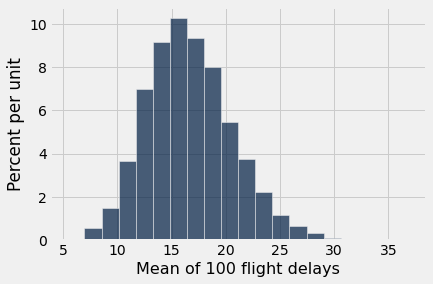

In [20]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


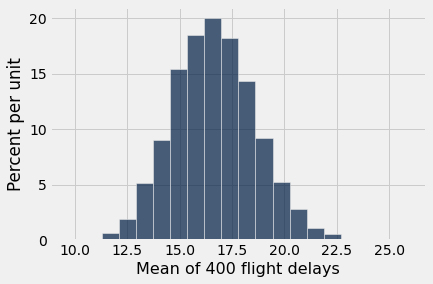

In [21]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

In [22]:
sample_means_900 = ten_thousand_sample_means(900)

## Distribution of the Sample Average

In [24]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)
means_tbl

400,900
17.3025,15.5478
17.37,15.3133
15.885,17.66
16.3,17.1256
17.42,16.1411
18.165,15.2922
16.46,14.9844
17.2125,15.42
18.625,16.6678
18.625,17.6378


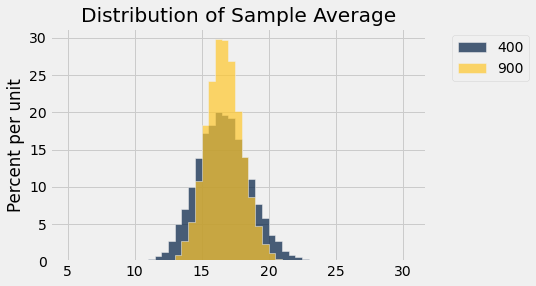

In [25]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [26]:
united.num_rows

13825

In [27]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [29]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [30]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.712522
Population SD: 39.480199851609314
SD of sample means: 3.940302473099749


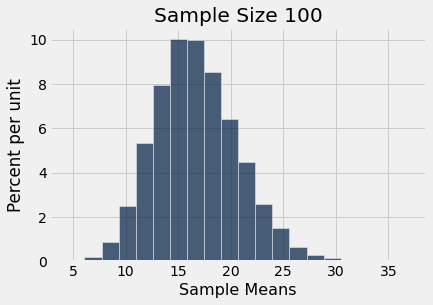

In [31]:
plot_and_summarize_sample_means(100)

In [32]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.67453875
Population SD: 39.480199851609314
SD of sample means: 1.9616288634380963


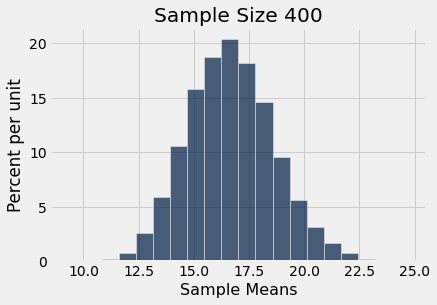

In [33]:
plot_and_summarize_sample_means(400)

In [34]:
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.6498728
Population SD: 39.480199851609314
SD of sample means: 1.5930598665599982


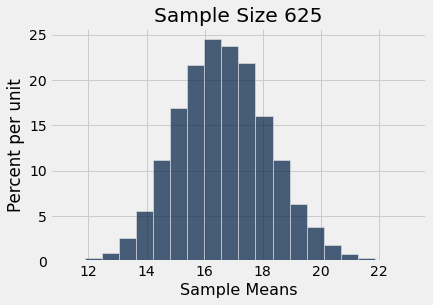

In [35]:
plot_and_summarize_sample_means(625)

In [36]:
39.48 / 1.577

25.034876347495242